In [2]:
import numpy as np
import corner
import h5py
import json
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import pycbc
from matplotlib.lines import Line2D
from scipy.stats import gaussian_kde, norm

from pycbc.conversions import mass1_from_mchirp_q, mass2_from_mchirp_q, f_schwarzchild_isco

from pycbc.types.frequencyseries import FrequencySeries
from pycbc.conversions import mass1_from_mchirp_eta, mass2_from_mchirp_eta
from plotting_utils import pos_samples, title_formats, plot_corner, ecdf


In [5]:
params_k = ['k']

factor = 1e-17

samps = [list(pos_samples('samples_cauchy_gam_3.5e-16_unifV_dL.hdf5', params_k).flatten()/factor), list(pos_samples('samples_cauchy_gam_3.5e-16_gaus_dL.hdf5', params_k).flatten()/factor), \
         list(pos_samples('samples_gauss_std_4e-16_gauss_dL.hdf5', params_k).flatten()/factor), list(pos_samples('samples_gauss_std_4e-16_unifV_dL.hdf5', params_k).flatten()/factor), \
         list(pos_samples('samples_unif_6.6e-16_fix_iota_dL.hdf5', params_k).flatten()/factor), list(pos_samples('samples_unif_6.6e-16_gauss_dL.hdf5', params_k).flatten()/factor), \
         list(pos_samples('samples_unif_6.6e-16_unifV_dL.hdf5', params_k).flatten()/factor), list(pos_samples('samples_unif_1e-13_unifV_dL.hdf5', params_k).flatten()/factor)]
                                                                                                                                                                        
B01 = [1.07, 1.52, 1.61, 1.61, 1.63, 1.82, 1.94, 3.26]

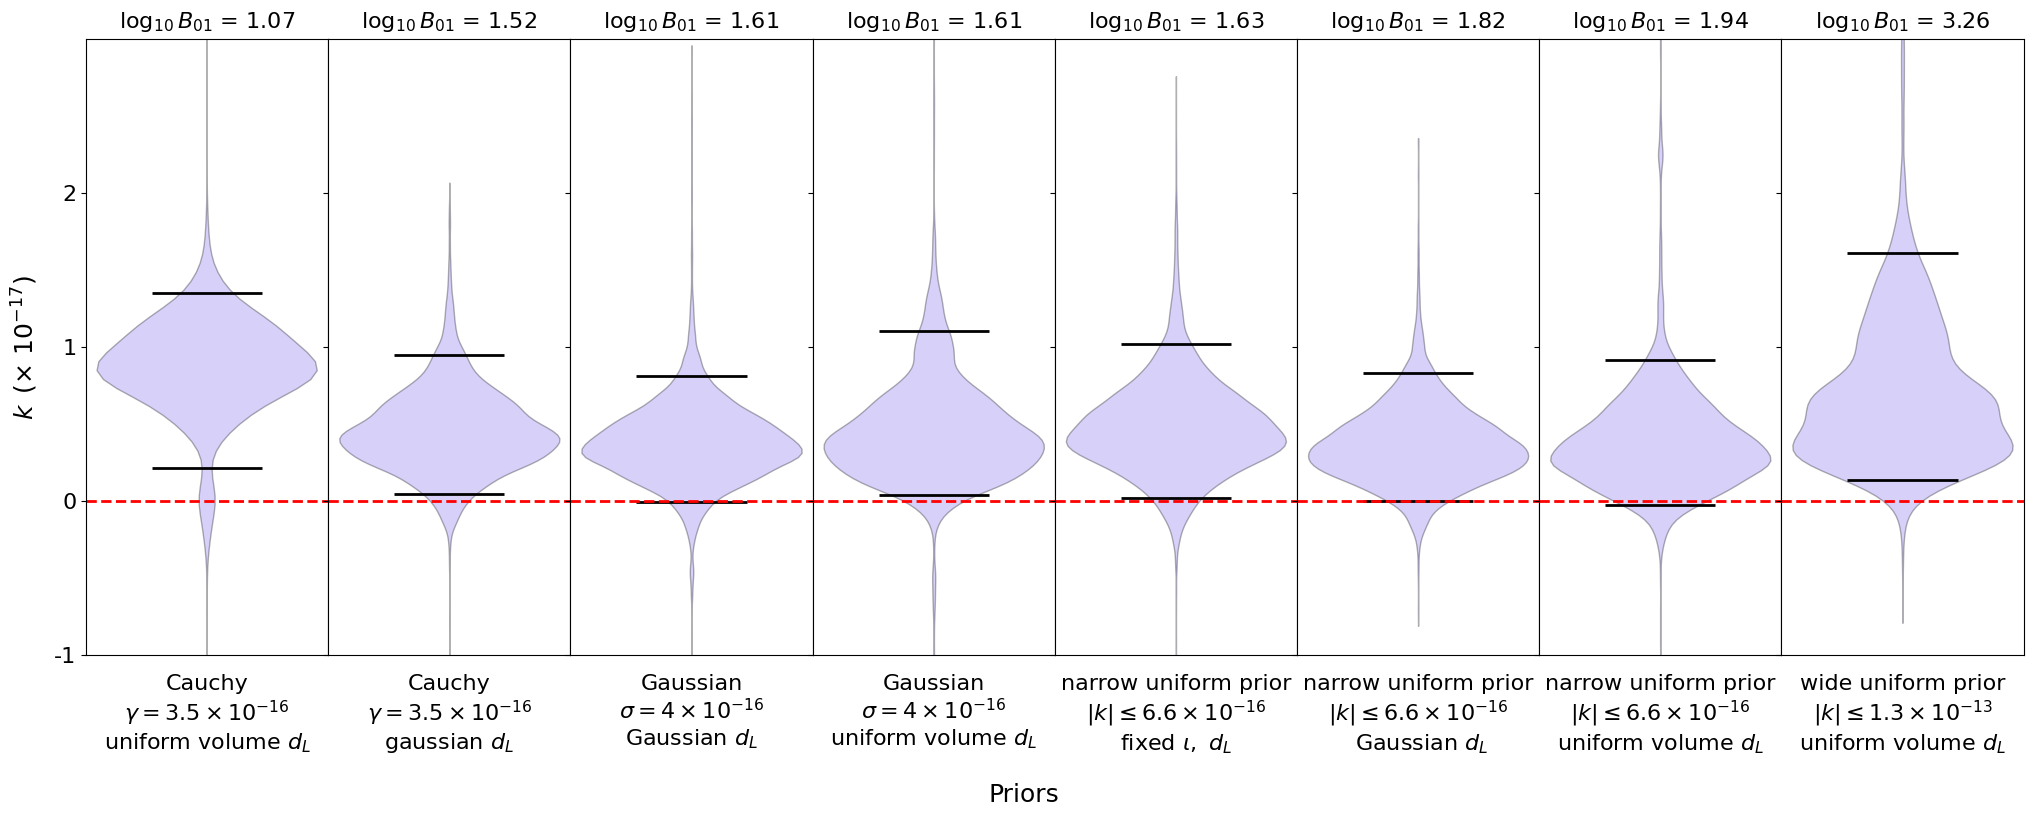

In [25]:
nrows, ncoms = 1, 8
fig, axs = plt.subplots(nrows, ncoms, figsize=(25, 8), sharey=True)

fontsize = 16

xlabel = ['Cauchy' + '\n' + r'$\gamma = 3.5 \times 10^{-16}$' + '\n' + r'uniform volume $d_L$', 'Cauchy' + '\n' + r'$\gamma = 3.5 \times 10^{-16}$' + '\n' + r'gaussian $d_L$', \
         'Gaussian' + '\n' + r'$\sigma = 4 \times 10^{-16}$' + '\n' + r'Gaussian $d_L$', 'Gaussian' + '\n' + r'$\sigma = 4 \times 10^{-16}$' + '\n' + r'uniform volume $d_L$', \
         'narrow uniform prior' + '\n' + r'$|k| \leq 6.6 \times 10^{-16}$' + '\n' + r'fixed $\iota, \, \, d_L$', 'narrow uniform prior' + '\n' + r'$|k| \leq 6.6 \times 10^{-16}$' + '\n' + r' Gaussian $d_L$', \
         'narrow uniform prior' + '\n' + r'$|k| \leq 6.6 \times 10^{-16}$' + '\n' + r'uniform volume $d_L$', 'wide uniform prior' + '\n' + r'$|k| \leq 1.3 \times 10^{-13}$' + '\n' + r'uniform volume $d_L$']
 
for j in range(ncoms):

    parts = axs[j].violinplot(samps[j], quantiles=[0.05, 0.95], widths=0.2, points=150, showextrema=False)
    axs[j].set_title(r'$\log_{10} B_{01}$ = %.2f'%B01[j], y = 1.005, fontsize=fontsize)
    axs[j].axhline(y=0, ls='--', c='r', lw=2)
    axs[j].set_ylim(-1, 3)
    axs[j].set_xticks([])
    if(j>0):
        axs[j].set_yticks([])
    axs[j].set_ylabel(r'$k \,\,\,(\times \,\, 10^{-17})$', fontsize=fontsize+2, labelpad=10)
    axs[j].set_xlabel(xlabel[j], fontsize=fontsize, labelpad=10)
    
    for pc in parts['bodies']:
        pc.set_facecolor('mediumslateblue')
        pc.set_edgecolor('black')
        pc.set_alpha(0.3)
        
    parts['cquantiles'].set_linewidth(2)
    parts['cquantiles'].set_edgecolor('black')
    
axs[0].set_yticks([-1, 0, 1, 2])
axs[0].set_yticklabels([-1, 0, 1, 2], fontsize=fontsize)  
    
fig.supxlabel('Priors', x = 0.5, y = -0.08, fontsize=fontsize+2)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.subplots_adjust(wspace=0, hspace=0.1)
plt.savefig('violin_plots.png', dpi=150, bbox_inches='tight')
